# ITAI 1371: Introduction to Machine Learning - Midterm Project

## Data Storytelling: An End-to-End ML Investigation

**Due Date:** One week from today  
**Time Allotment:** Approx. 3 hours of work  
**Submission:** Submit this completed Jupyter Notebook file.

---

### Project Goal

Your mission is to conduct a complete machine learning investigation, from data exploration to model evaluation. More than just writing code, you will be a **data storyteller**. Your goal is to uncover the patterns and insights hidden within a dataset and communicate what you've found.

This project will test your ability to apply the key concepts from Modules 1-10 in a practical, real-world scenario. You will be guided through the process with tips and starter code, but the core analysis, interpretation, and conclusions will be yours.

### Academic Integrity & Use of AI Tools

- This is an **open-book, open-note** midterm. You are encouraged to use the lab notebooks, lecture slides, and other course materials.
- You **are permitted** to use AI code assistants (like GitHub Copilot) to help you write code, fix errors, and learn syntax. This is a valuable real-world skill.
- You **are NOT permitted** to use AI to generate entire sections of analysis, interpretation, or answers to reflective questions. The goal is for *you* to demonstrate understanding.

**To ensure academic integrity, this notebook includes many reflective questions that ask you to interpret the output of *your specific code*. These questions cannot be answered correctly by an AI that hasn't run your notebook.**

---

### Grading Rubric (100 Points Total)

| Section | Task | Points |
| :--- | :--- | :--- |
| **Part 1: Data Loading** | Successfully load your chosen dataset. | 5 |
| **Part 2: EDA** | Create and interpret at least two relevant visualizations. | 20 |
| | Write a clear interpretation of the story your plots tell. | |
| **Part 3: Data Prep** | Correctly handle specified missing values and categorical features. | 15 |
| | Justify your choices in the markdown cells. | |
| **Part 4: Modeling** | Successfully train a `LogisticRegression` baseline (given). | 15 |
| | Successfully train a second model of your choice. | |
| **Part 5: Evaluation** | Calculate and compare accuracy for both models. | 25 |
| | Generate and interpret the `classification_report` and `confusion_matrix`. | |
| | Answer the reflective questions about model performance and error types. | |
| **Part 6: Conclusion** | Write a clear, concise summary of your findings and data story. | 15 |
| | Address the key questions in the conclusion prompt. | |
| **Overall** | Code is clean, commented, and runs without errors. All markdown cells are filled out. | 5 |


## Part 1: Choose Your Dataset (5 Points)

For this project, you can choose one of the following two classic datasets. Both are classification problems.

1.  **Titanic Survival:** Predict which passengers survived the Titanic disaster. (You are familiar with this from our lab).
2.  **Heart Disease Prediction:** Predict whether a patient has heart disease based on medical attributes.

**Instructions:**

1.  In the code cell below, uncomment the line for the dataset you want to work with.
2.  Run the cell to load the data into a pandas DataFrame called `df`.
3.  Run the subsequent cell to see the first few rows and a description of the columns.


In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# --- CHOOSE YOUR DATASET ---
# Uncomment one of the two lines below to select your dataset

# Option 1: Titanic Dataset
dataset_url = 'https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv'

# Option 2: Heart Disease Dataset
# dataset_url = 'https://raw.githubusercontent.com/plotly/datasets/master/heart.csv'

# --- LOAD THE DATA ---
# This code will load the dataset from the URL you selected above
try:
    df = pd.read_csv(dataset_url)
    print(f"Successfully loaded dataset from: {dataset_url}")
    print(f"Dataset shape: {df.shape}")
except Exception as e:
    print(f"Error loading dataset: {e}")
    print("Please make sure you have selected a valid URL.")


Successfully loaded dataset from: https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv
Dataset shape: (891, 12)


### Data Overview

Run the cell below to display the first 5 rows of your dataset, a list of its columns, and a brief description of what each column means.


In [12]:
# Display the first 5 rows of the dataframe
print("--- First 5 Rows ---")
print(df.head())

# Display column info and descriptions
print("--- Column Descriptions ---")
if 'PassengerId' in df.columns:
    # Titanic Dataset
    print("You are using the Titanic Dataset.")
    print("Target Variable: 'Survived' (0 = No, 1 = Yes)")
    # ... (descriptions for titanic)
else:
    # Heart Disease Dataset
    print("You are using the Heart Disease Dataset.")
    print("Target Variable: 'target' (0 = No Heart Disease, 1 = Has Heart Disease)")
    # ... (descriptions for heart disease)

# A helper to rename columns for the heart disease dataset for clarity
if 'cp' in df.columns:
    df = df.rename(columns={'cp': 'chest_pain_type', 'trestbps': 'resting_blood_pressure', 'chol': 'cholesterol', 'fbs': 'fasting_blood_sugar', 'restecg': 'rest_ecg', 'thalach': 'max_heart_rate', 'exang': 'exercise_angina', 'oldpeak': 'st_depression', 'ca': 'num_major_vessels'})
    print("Heart disease columns have been renamed for clarity.")

print("--- Data Info ---")
df.info()


--- First 5 Rows ---
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.050

## Part 2: Exploratory Data Analysis (EDA) & Storytelling (20 Points)

Now, it's time to be a data detective. Before you can model the data, you must understand it. What secrets does it hold?

**Your Task:**

1.  **Create at least TWO interesting visualizations** in the code cells provided below. You can create more if you like.
    *   Use libraries like `matplotlib` or `seaborn`.
    *   Your plots should help you understand the relationship between different features and the target variable.
    *   **Tip:** Think about the questions we asked during the Titanic lab (e.g., "How does survival rate differ by gender?" or "What is the age distribution of survivors?"). Ask similar questions of your dataset.
2.  **Interpret your visualizations** in the markdown cell provided. Explain what you see and what story your plots are starting to tell.


### Visualization 1

**Instructions:** Create your first plot in the cell below. Make sure to give it a title and label your axes! Good plots are easy to read.



Survival by Passenger Class:
        Survived  Total Survival Rate
Pclass                               
1            136    216         63.0%
2             87    184         47.3%
3            119    491         24.2%




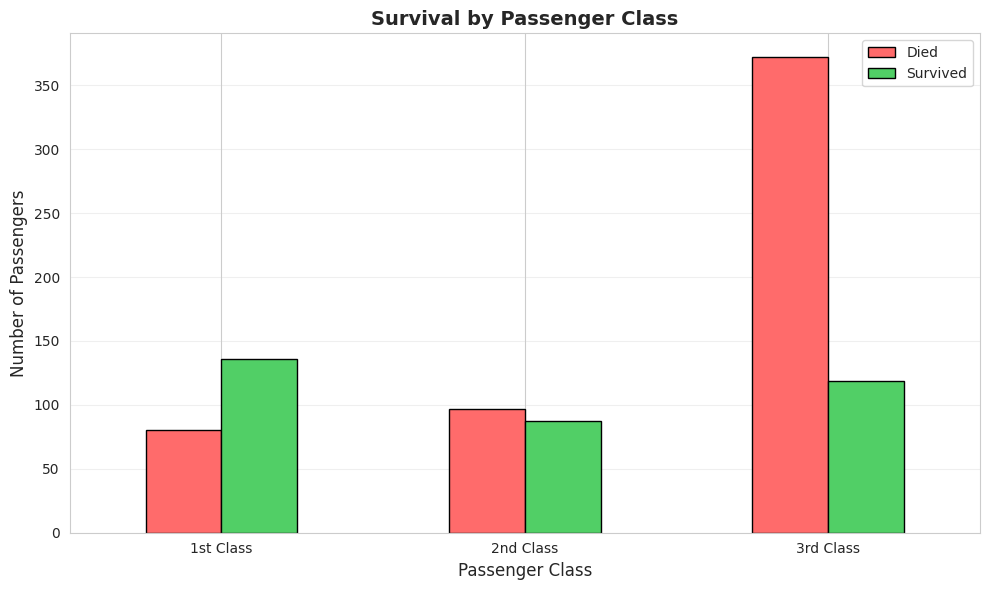

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')

# --- ENTER YOUR CODE HERE --- For Passanger Class
# Create your first visualization. Some ideas:
# - A countplot to see the distribution of the target variable.
# - A barplot to compare a feature against the target (e.g., 'sex' vs 'survived').
# - A histogram or KDE plot to see the distribution of a numerical feature (e.g., 'age').

print("\nSurvival by Passenger Class:")
print("="*40)
class_survival = df.groupby('Pclass')['Survived'].agg(['sum', 'count', 'mean'])
class_survival.columns = ['Survived', 'Total', 'Survival Rate']
class_survival['Survival Rate'] = class_survival['Survival Rate'].apply(lambda x: f"{x:.1%}")
print(class_survival)
print("\n")


fig, ax = plt.subplots(figsize=(10, 6))
# Example: sns.countplot(x='your_feature', data=df)
df.groupby(['Pclass', 'Survived']).size().unstack().plot(kind='bar', ax=ax, color=['#ff6b6b', '#51cf66'], edgecolor='black')
ax.set_xlabel('Passenger Class', fontsize=12)
ax.set_ylabel('Number of Passengers', fontsize=12)
ax.set_title('Survival by Passenger Class', fontsize=14, fontweight='bold')
ax.set_xticklabels(['1st Class', '2nd Class', '3rd Class'], rotation=0)
ax.legend(['Died', 'Survived'])
ax.grid(axis='y', alpha=0.3)
plt.tight_layout()

# --- END OF YOUR CODE ---
plt.show()


### Visualization 2

**Instructions:** Create your second plot in the cell below. Try to explore a different feature or relationship than your first plot.



Survival by Gender:
        Survived  Total Survival Rate
Sex                                  
female       233    314         74.2%
male         109    577         18.9%




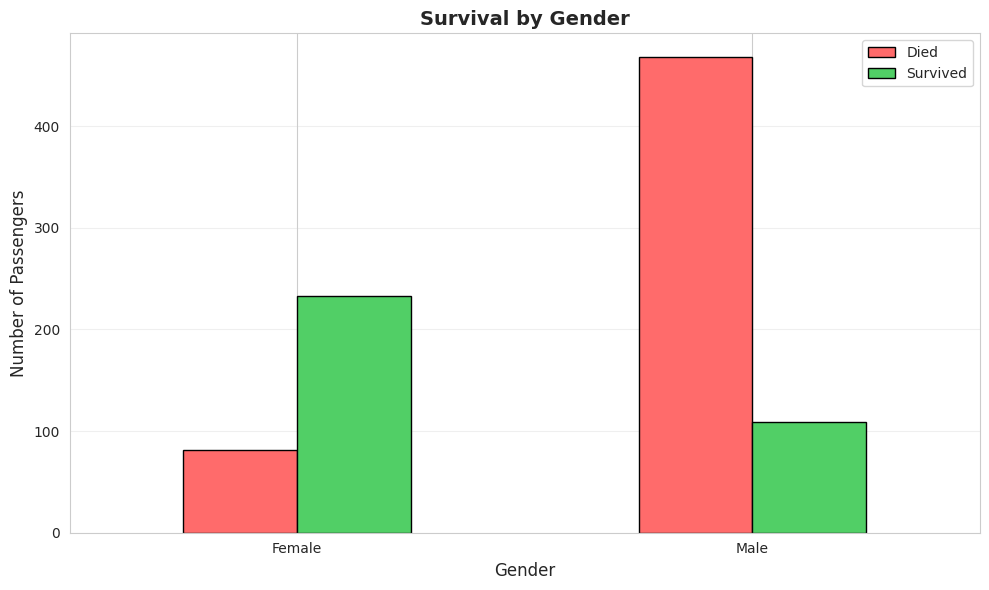

In [14]:
# --- ENTER YOUR CODE HERE --- For Gender
# Create your second visualization. Some ideas:
# - A boxplot to see the distribution of a numerical feature across different categories.
# - A heatmap of correlations between numerical features.
# - A facet grid to explore relationships across multiple categories.
print("\nSurvival by Gender:")
print("="*40)
gender_survival = df.groupby('Sex')['Survived'].agg(['sum', 'count', 'mean'])
gender_survival.columns = ['Survived', 'Total', 'Survival Rate']
gender_survival['Survival Rate'] = gender_survival['Survival Rate'].apply(lambda x: f"{x:.1%}")
print(gender_survival)
print("\n")

fig, ax = plt.subplots(figsize=(10, 6))
# Example: sns.boxplot(x='categorical_feature', y='numerical_feature', data=df)
df.groupby(['Sex', 'Survived']).size().unstack().plot(kind='bar', ax=ax, color=['#ff6b6b', '#51cf66'], edgecolor='black')
ax.set_xlabel('Gender', fontsize=12)
ax.set_ylabel('Number of Passengers', fontsize=12)
ax.set_title('Survival by Gender', fontsize=14, fontweight='bold')
ax.set_xticklabels(['Female', 'Male'], rotation=0)
ax.legend(['Died', 'Survived'])
ax.grid(axis='y', alpha=0.3)
plt.tight_layout()


# --- END OF YOUR CODE ---
plt.show()


### Interpretation of Your Visualizations

**Instructions:** Based on the two plots you created above, answer the following questions in this markdown cell.

1.  **What did you plot?** (Briefly describe your two visualizations).
2.  **What story do your plots tell?** (What initial insights or patterns did you discover? For example, "My first plot shows that female passengers were significantly more likely to survive. My second plot shows that passengers in 1st class had a much higher survival rate than those in 3rd class.")
3.  **What is one hypothesis you can form based on your EDA?** (e.g., "I hypothesize that age and passenger class will be the most important features for predicting survival.")

**--- ENTER YOUR ANSWERS BELOW ---**

1.  ...
I created two bar graphs as I believed the bar graphs to show an easier visual reference towards the data. Created simply by reffering as to what data set survived and didn't. First visual shows survived and non-survived based off of the passanger class. My second visual shows survival and non-survival based on the gender.
2.  ...
In my first visual, it represents the survived and not from passanger class. Given the first visual, First class had a slightly better survived number, but ratio wise the third class had a huge increase as to passangers who did not survive. Third class has a higher chance for death. My second visual shows females had a drastically higher survival rate than the men.
3.  ...
Based on the EDA, I hypothesize that class and gender will be top priority for depicting survival rate.


## Part 3: Data Preparation & Feature Engineering (15 Points)

Raw data is messy. We need to clean it up before feeding it to our models.

**Your Task:**

1.  **Handle Missing Values:** I've provided code to check for missing values. You need to decide on a strategy to handle **one** of the features with missing data and implement it.
2.  **Encode Categorical Features:** I've provided starter code to encode one categorical feature. You need to encode **one more** categorical feature of your choice.
3.  **Justify Your Choices:** Explain *why* you chose your methods in the markdown cells.


In [15]:
# Check for missing values
df_prep = df.copy()
print("--- Missing Values Before ---")
print(df.isnull().sum())


# --- ENTER YOUR CODE HERE for Missing Values ---
# Choose ONE feature with missing values and handle it.
# I chose age.
# Tip: For 'age', filling with the median is a good start. For 'embarked', filling with the mode is a good start.
df['Age'].fillna(df['Age'].median(), inplace=True)

# --- END OF YOUR CODE ---

print("--- Missing Values After ---")
print(df.isnull().sum())


--- Missing Values Before ---
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
--- Missing Values After ---
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


/tmp/ipython-input-1804571889.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)


**Justification for Handling Missing Values:**

**Instructions:** Explain the choice you made above.

1.  **Which feature did you choose?**
2.  **What method did you use to handle the missing values (e.g., fill with median, mode, or drop)?**
3.  **Why was this an appropriate method for this feature?**

**--- ENTER YOUR ANSWERS BELOW ---**

1.  ...
Age
2.  ...
Median
3.  ...
It was appropiate as the missing number were alot but not a drastic feature to drop to where it was not applicable or important data, giving the median for the age is fine as we do not want to completly changed the features drastically. We have plenty of age numbers to "fill in the blank" and be comfortable that predictions will not fault.


In [16]:
# --- Starter Code for Encoding ---
# For the Titanic dataset, we encode 'Sex'. For Heart Disease, we'll use 'sex' as well.
if 'sex' in df.columns:
    df['sex_encoded'] = df['sex'].map({1: 'male', 0: 'female'}).map({'female': 0, 'male': 1})
elif 'Sex' in df.columns:
    df['sex_encoded'] = df['Sex'].map({'female': 0, 'male': 1})

print("--- Encoding Example: Sex ---")
print(df[['sex' if 'sex' in df.columns else 'Sex', 'sex_encoded']].head())

# --- ENTER YOUR CODE HERE for Categorical Encoding ---
# Choose ONE more categorical feature and encode it.
# Tip: For a feature with 2 categories, .map() is great.
# For a feature with 3+ categories, pd.get_dummies() is a good choice.
# Example for Titanic: pd.get_dummies(df, columns=['Embarked'], drop_first=True)

if 'Embarked' in df.columns:
    df = pd.get_dummies(df, columns=['Embarked'], prefix='Embarked', drop_first=True, dtype=int)

# --- END OF YOUR CODE ---

print("\n--- Dataframe after your encoding ---\n")
print(df.head())

--- Encoding Example: Sex ---
      Sex  sex_encoded
0    male            1
1  female            0
2  female            0
3  female            0
4    male            1

--- Dataframe after your encoding ---

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin  sex_encoded  Embarked_Q  Embarked_S  
0      0         A/5 21171   7.

**Justification for Encoding Categorical Features:**

**Instructions:** Explain the choice you made above.

1.  **Which feature did you choose to encode?**
2.  **What encoding method did you use (e.g., map, pd.get_dummies)?**
3.  **Why was this the right method? If you used `get_dummies`, why is `drop_first=True` often a good idea?**

**--- ENTER YOUR ANSWERS BELOW ---**

1.  ...
Embarked.
2.  ...
pd.get_dummies
3.  ...
Yes, It helps identify quicker, for if they are all False or 0 then it mist be the other. Shortens the chart.



## Part 4 & 5: Modeling and Evaluation (40 Points)

Now for the main event! Let's train some models and see how well they can predict outcomes.

**Your Task:**

1.  **Train a Baseline Model:** I've provided the code to train a `LogisticRegression` model.
2.  **Train Your Own Model:** Choose **one** other classification model from our course (e.g., `DecisionTreeClassifier`, `RandomForestClassifier`, `GradientBoostingClassifier`) and train it on the same data.
3.  **Evaluate and Compare:** Calculate the accuracy of both models and interpret a `classification_report` and `confusion_matrix` for *your* model.
4.  **Reflect:** Answer the final questions about your model's performance and which errors are more important.


In [17]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# --- Define Features (X) and Target (y) ---
# This is a sample feature set. You may need to adjust it based on the columns you created/dropped!
# Make sure all columns are numeric and have no missing values.

# Drop non-numeric or irrelevant columns before defining features
df_model = df.copy()
df_model = df_model.select_dtypes(include=np.number).dropna()

if 'PassengerId' in df_model.columns:
    df_model = df_model.drop(columns=['PassengerId'])

# Define target variable name based on dataset
target_col = 'Survived' if 'Survived' in df_model.columns else 'target'

X = df_model.drop(target_col, axis=1)
y = df_model[target_col]

# --- Split Data ---
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set has {X_train.shape[0]} samples.")
print(f"Test set has {X_test.shape[0]} samples.")
print(f"Features: {X.columns.tolist()}")


Training set has 712 samples.
Test set has 179 samples.
Features: ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'sex_encoded', 'Embarked_Q', 'Embarked_S']


### Model 1: Logistic Regression (Baseline)

This model is provided for you as a baseline to compare against.


In [18]:
# Train the baseline model
log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_train, y_train)

# Make predictions and evaluate
y_pred_log_reg = log_reg.predict(X_test)
acc_log_reg = accuracy_score(y_test, y_pred_log_reg)

print(f"Baseline Model (Logistic Regression) Test Accuracy: {acc_log_reg:.2%}")


Baseline Model (Logistic Regression) Test Accuracy: 81.01%


### Model 2: Your Chosen Model

**Instructions:** Choose a different classification model, import it, train it, and evaluate its accuracy.


In [19]:
# --- ENTER YOUR CODE HERE ---
# 1. Import your chosen model class
from sklearn.ensemble import RandomForestClassifier

# 2. Create an instance of your model
my_model = RandomForestClassifier(random_state=42)

# 3. Train your model on the training data
my_model.fit(X_train, y_train)

# 4. Make predictions on the test data
y_pred_my_model = my_model.predict(X_test)
train_acc_my = my_model.score(X_train, y_train)
test_acc_my = my_model.score(X_test, y_test)

# 5. Calculate the accuracy of your model
acc_my_model = accuracy_score(y_test, y_pred_my_model)

print(f"Your Model (...) Test Accuracy: {acc_my_model:.2%}")



# --- END OF YOUR CODE ---


Your Model (...) Test Accuracy: 82.12%


### Evaluation and Reflection

**Instructions:** Now, let's dig deeper into *your* model's performance. Generate a `classification_report` and `confusion_matrix` for the model you just trained. Then, answer the reflective questions.


              precision    recall  f1-score   support

           0       0.83      0.87      0.85       105
           1       0.80      0.76      0.78        74

    accuracy                           0.82       179
   macro avg       0.82      0.81      0.81       179
weighted avg       0.82      0.82      0.82       179

[[91 14]
 [18 56]]


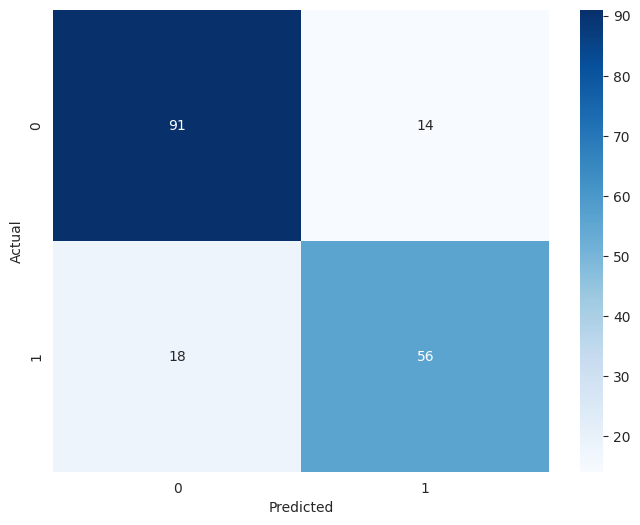

In [20]:
# --- ENTER YOUR CODE HERE ---
# Generate and print the classification report for your model
print(classification_report(y_test, y_pred_my_model))

# Generate and print the confusion matrix for your model
cm = confusion_matrix(y_test, y_pred_my_model)
print(cm)

# Optional: Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()



# --- END OF YOUR CODE ---


**Reflection Questions:**

**Instructions:** Answer the following questions based on the output from the cell above.

1.  **Which model performed better, the baseline or yours?** Was it a big difference?
2.  **Look at the `classification_report` for your model. What are the precision and recall for the positive class (1)?** (Just state the values).
3.  **Interpret the precision and recall. In the context of your chosen dataset, what do these numbers mean?** (e.g., "A recall of 0.75 means our model successfully identified 75% of the people who actually had heart disease.")
4.  **Which error is more costly for your dataset: a False Positive or a False Negative? Explain your reasoning.** (There is no single right answer, it depends on your justification).
    *   **Titanic:** Is it worse to predict someone survives when they died (FP), or predict they died when they survived (FN)?
    *   **Heart Disease:** Is it worse to tell a healthy person they have heart disease (FP), or tell a sick person they are healthy (FN)?

**--- ENTER YOUR ANSWERS BELOW ---**

1.  ...
My Model trained better. Not a big difference.
2.  ...
Precision = 0.80, Recall = 0.76.
3.  ...
A precision of 0.80 means when the model says a passanger will survive, it is 80% to be correct. A recall of 0.76 means of the actual survived, the model prediction got 76% right.
4.  ...
I believe it is worse to predict someone as survived when they actually died. It would give false hope and confidence in the model and real life outcomes. A flase positive would be costly.


## Part 6: Conclusion - Tell Your Data Story (15 Points)

This is your final summary. Bring together everything you've learned from your investigation.

**Instructions:**

Write 2-3 paragraphs summarizing your project. Your summary should be a narrative that tells the story of your data. Address the following points:

-   **What was the main goal of your project?**
-   **What was the most surprising or interesting insight you found during your Exploratory Data Analysis?**
-   **Which features seemed to be the most important for making predictions?**
-   **How well did your best model perform, and what are its limitations?** (Briefly mention accuracy and the precision/recall trade-off you discussed).
-   **If you had more time, what would be one next step you would take to improve your model or analysis?**

**--- ENTER YOUR CONCLUSION BELOW ---**

...
The main goal of the project was to train my own model and see how it compares to the "real world" result. Ultimatly finding a way for the model to predict accurate results that has a chance to be used for other companies. The most surprising feature to me was the amount of people survived from the third class. I would have guessed the number of survived to have been lower.When making this model, what seemed to be the most important feature depecting survival was gender. Females had a greater chance of survival than men.

My model performed well, given the presicion and recall, it was mostly accurate towards predicting the true positives instead of false positives which is what we were looking for. It would seem my limitations are just towards the survival rate true numbers and not relient on other factors like families combined, if i had time to depict numbers of full familes survived that would help in seeing what the relient feature was. If i had more time I would have changed some more data to find more reliable results. I would probably deal with some more encoding on categorical numbers to help maybe refine some of the features catagories. I would assume if i could shrink it, I would assume it would be more accurate or just even give a different outlook on survival rates given different features.



## 🎉 You've reached the end of the midterm project! 🎉

**Before you submit:**

1.  Go to the `Kernel` menu and select `Restart & Run All`. This will run all your cells from top to bottom.
2.  Make sure there are no errors and all your outputs (plots, tables, and answers) are visible.
3.  Save the notebook file (`.ipynb`).
4.  Submit the file as your midterm.

**Great work!**
